## Dimensionality Reduction, Feature Extraction, and
Manifold Learnin

#### Principal Component Analysis (PCA)
Principal component analysis is a method that rotates the dataset in a way such that
the rotated features are statistically uncorrelated. This rotation is often followed by
selecting only a subset of the new features, according to how important they are for
explaining the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer


#### Applying PCA to the cancer dataset for visualization
One of the most common applications of PCA is visualizing high-dimensional data‐
sets. it is hard to create scatter plots of data that has more than two features. For the Iris dataset, we were able to create a pair plot that gave us a partial picture of the data by showing us all the possible
combinations of two features. But if we want to look at the Breast Cancer dataset,
even using a pair plot is tricky. This dataset has 30 features, which would result in
30 * 14 = 420 scatter plots! We’d never be able to look at all these plots in detail, let
alone try to understand them.

There is an even simpler visualization we can use, though—computing histograms of
each of the features for the two classes, benign and malignant cancer 

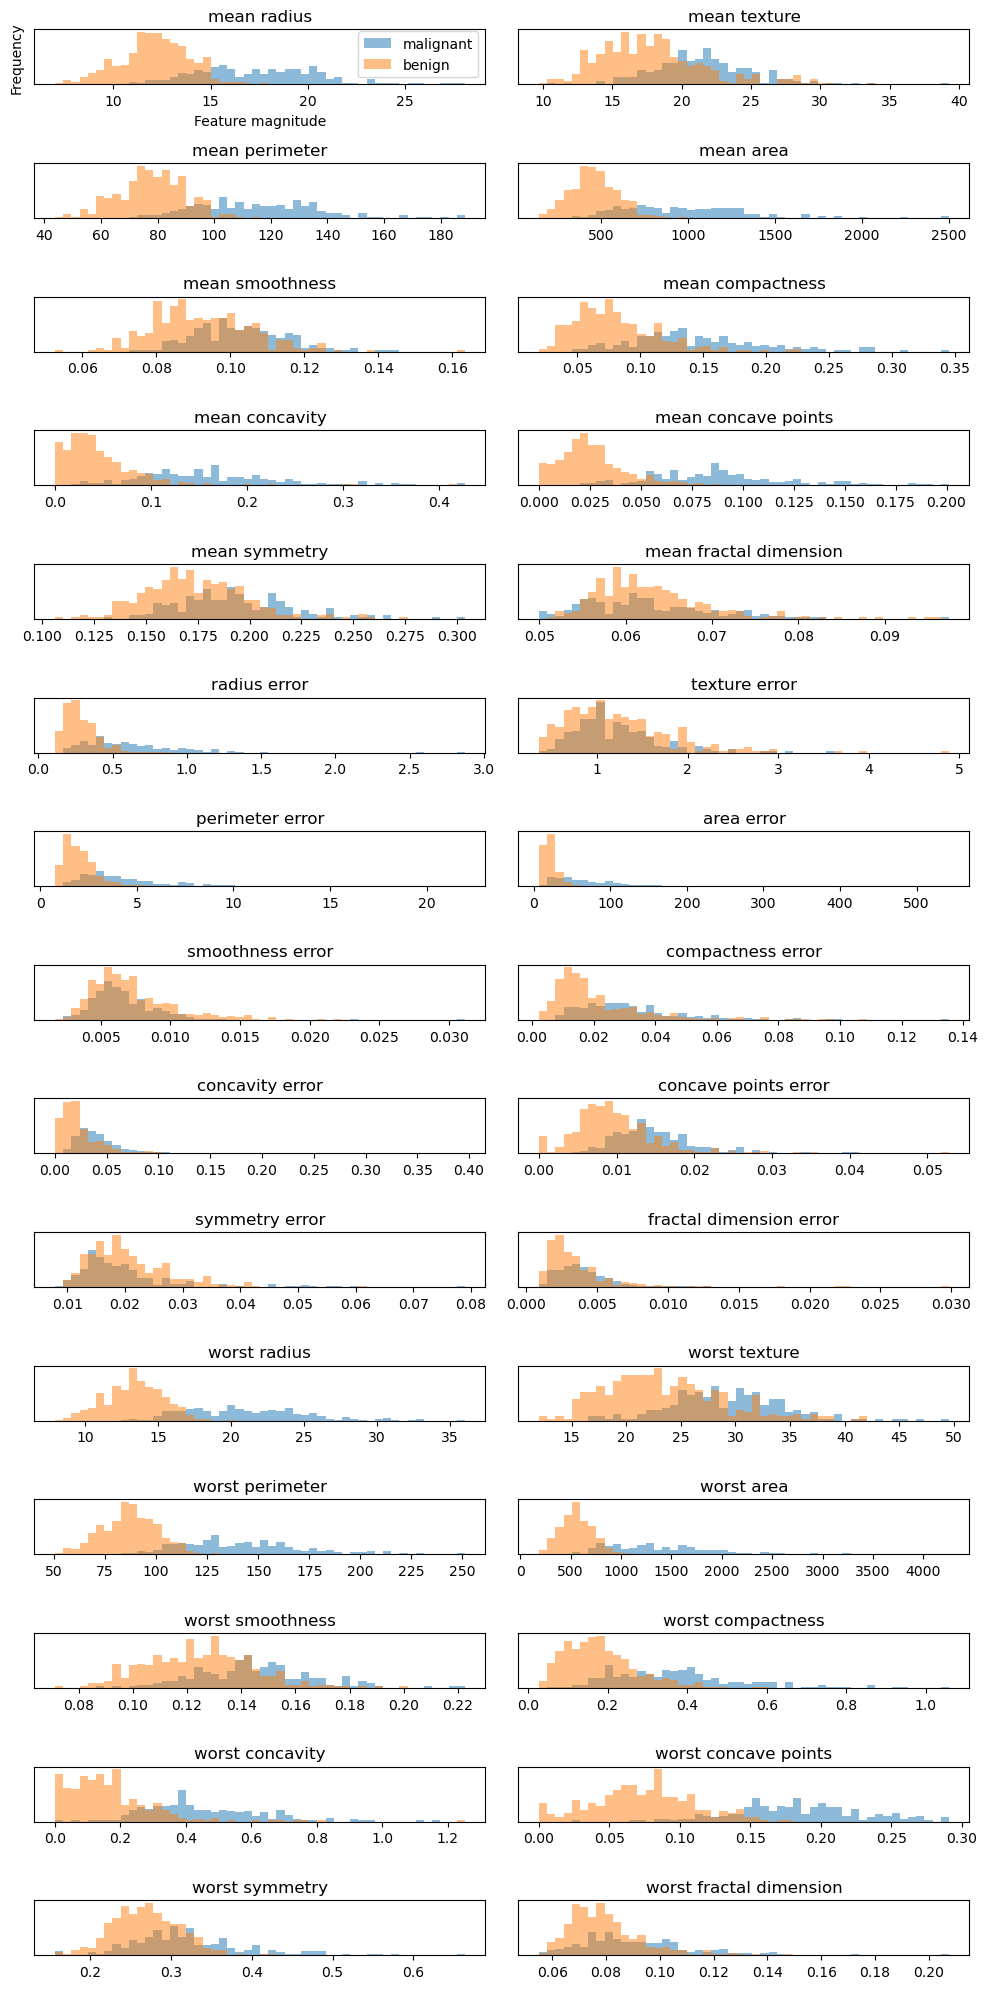

In [2]:
cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
 _, bins = np.histogram(cancer.data[:, i], bins=50)
 ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
 ax[i].hist(benign[:, i], bins=bins,  alpha=.5)
 ax[i].set_title(cancer.feature_names[i])
 ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Here we create a histogram for each of the features, counting how often a data point
appears with a feature in a certain range (called a bin). Each plot overlays two histo‐
grams, one for all of the points in the benign class (blue) and one for all the points in
the malignant class (red). This gives us some idea of how each feature is distributed
across the two classes, and allows us to venture a guess as to which features are better
at distinguishing malignant and benign samples. For example, the feature “smooth‐
ness error” seems quite uninformative, because the two histograms mostly overlap,
while the feature “worst concave points” seems quite informative, because the histo‐
grams are quite disjoint.
However, this plot doesn’t show us anything about the interactions between variables
and how these relate to the classes. Using PCA, we can capture the main interactions
and get a slightly more complete picture. We can find the first two principal compo‐
nents, and visualize the data in this new two-dimensional space with a single scatter
plot.
Before we apply PCA, we scale our data so that each feature has unit variance using
StandardScaler:

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Learning the PCA transformation and applying it is as simple as applying a prepro‐
cessing transformation. We instantiate the PCA object, find the principal components
by calling the fit method, and then apply the rotation and dimensionality reduction
by calling transform. By default, PCA only rotates (and shifts) the data, but keeps all
principal components. To reduce the dimensionality of the data, we need to specify
how many components we want to keep when creating the PCA object

In [4]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


Original shape: (569, 30)
Reduced shape: (569, 2)


We can now plot the first two principal components

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Second principal component')

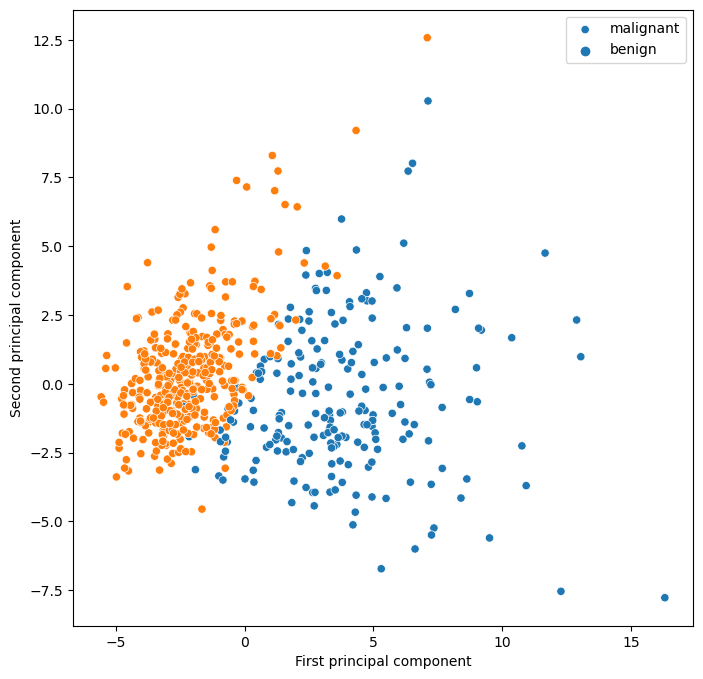

In [5]:
plt.figure(figsize=(8, 8))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names,loc="best")
#plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

It is important to note that PCA is an unsupervised method, and does not use any class
information when finding the rotation. It simply looks at the correlations in the data.
For the scatter plot shown here, we plotted the first principal component against the histogram

second principal component, and then used the class information to color the points.
You can see that the two classes separate quite well in this two-dimensional space.
This leads us to believe that even a linear classifier (that would learn a line in this
space) could do a reasonably good job at distinguishing the two classes. We can also
see that the malignant (red) points are more spread out than the benign (blue) points
—something that we could already see a bit from the histograms

A downside of PCA is that the two axes in the plot are often not very easy to interpret.
The principal components correspond to directions in the original data, so they are
combinations of the original features. However, these combinations are usually very
complex, as we’ll see shortly. T

In [6]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


Each row in components_ corresponds to one principal component, and they are sor‐
ted by their importance (the first principal component comes first, etc.). The columns
correspond to the original features attribute of the PCA in this example, “mean
radius,” “mean texture,” and so on. Let’s have a look at the content of components_

In [7]:
print("PCA components:\n{}".format(pca.components_))


PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


We can also visualize the coefficients using a heat map

Text(0, 0.5, 'Principal components')

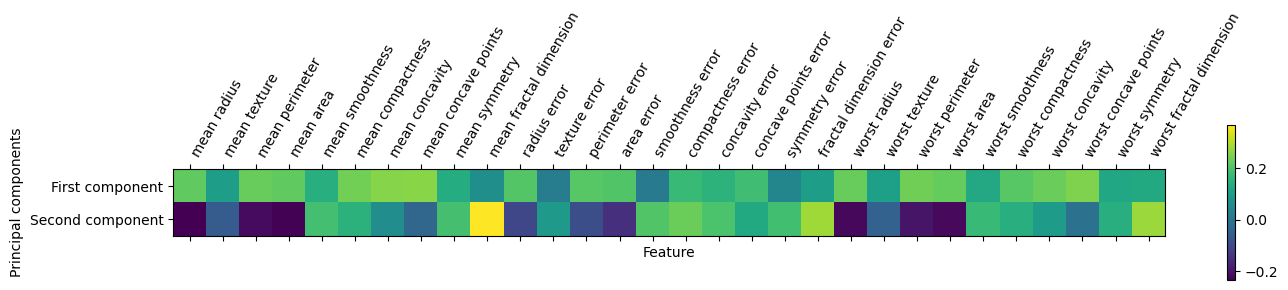

In [8]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
 cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

You can see that in the first component, all features have the same sign (it’s negative,
but as we mentioned earlier, it doesn’t matter which direction the arrow points in).
That means that there is a general correlation between all features. As one measure‐
ment is high, the others are likely to be high as well. The second component has
mixed signs, and both of the components involve all of the 30 features.

#### Eigenfaces for feature extraction
Another application of PCA that we mentioned earlier is feature extraction. The idea
behind feature extraction is that it is possible to find a representation of your data
that is better suited to analysis than the raw representation you were given. A great
example of an application where feature extraction is helpful is with images. Images
are made up of pixels, usually stored as red, green, and blue (RGB) intensities.
Objects in images are usually made up of thousands of pixels, and only together are
they meaningful.
We will give a very simple application of feature extraction on images using PCA, by
working with face images from the Labeled Faces in the Wild dataset. This dataset
contains face images of celebrities downloaded from the Internet, and it includes
faces of politicians, singers, actors, and athletes from the early 2000s. We use gray‐
scale versions of these images, and scale them down for faster processing

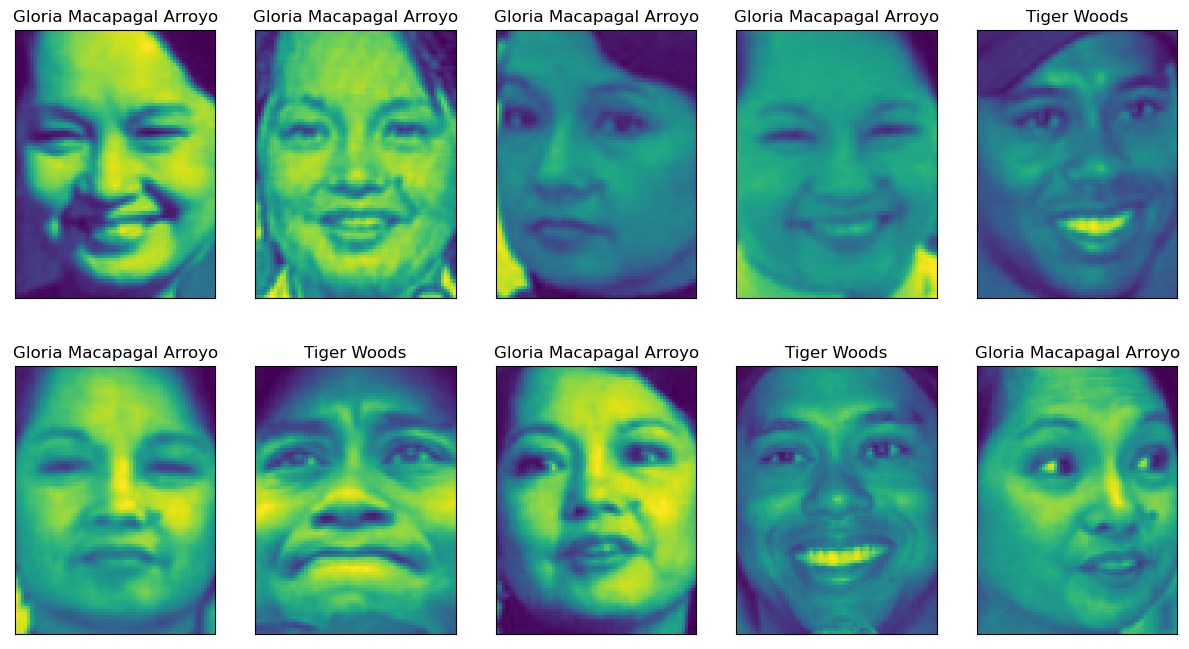

In [9]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 ax.set_title(people.target_names[target])


There are 67 images, each 87×65 pixels large, belonging to 2 different people:

In [10]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))


people.images.shape: (67, 87, 65)
Number of classes: 2


In [11]:
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Gloria Macapagal Arroyo    44 Tiger Woods                23 

A common task in face recognition is to ask if a previously unseen face belongs to a
known person from a database. This has applications in photo collection, social
media, and security applications. One way to solve this problem would be to build a
classifier where each person is a separate class. However, there are usually many dif‐
ferent people in face databases, and very few images of the same person (i.e., very few
training examples per class). That makes it hard to train most classifiers. Additionally

you often want to be able to add new people easily, without needing to retrain a large
model.
A simple solution is to use a one-nearest-neighbor classifier that looks for the most
similar face image to the face you are classifying. This classifier could in principle
work with only a single training example per class. Let’s take a look at how well
KNeighborsClassifier does here:

In [12]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.


C:\Users\User\AppData\Local\Temp\ipykernel_5076\2172832638.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.94


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


This is where PCA comes in. Computing distances in the original pixel space is quite
a bad way to measure similarity between faces. When using a pixel representation to
compare two images, we compare the grayscale value of each individual pixel to the
value of the pixel in the corresponding position in the other image. This representa‐
tion is quite different from how humans would interpret the image of a face, and it is
hard to capture the facial features using this raw representation. For example, using
pixel distances means that shifting a face by one pixel to the right corresponds to a
drastic change, with a completely different representation. We hope that using distan‐
ces along principal components can improve our accuracy. Here, we enable the
whitening option of PCA, which rescales the principal components to have the same
scale. This is the same as using StandardScaler after the transformation

In [14]:
pca = PCA().fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (50, 50)


In [15]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn1.score(X_test_pca, y_test)))

Test set accuracy: 0.94


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
print("pca.components_.shape: {}".format(pca.components_.shape))


pca.components_.shape: (50, 5655)


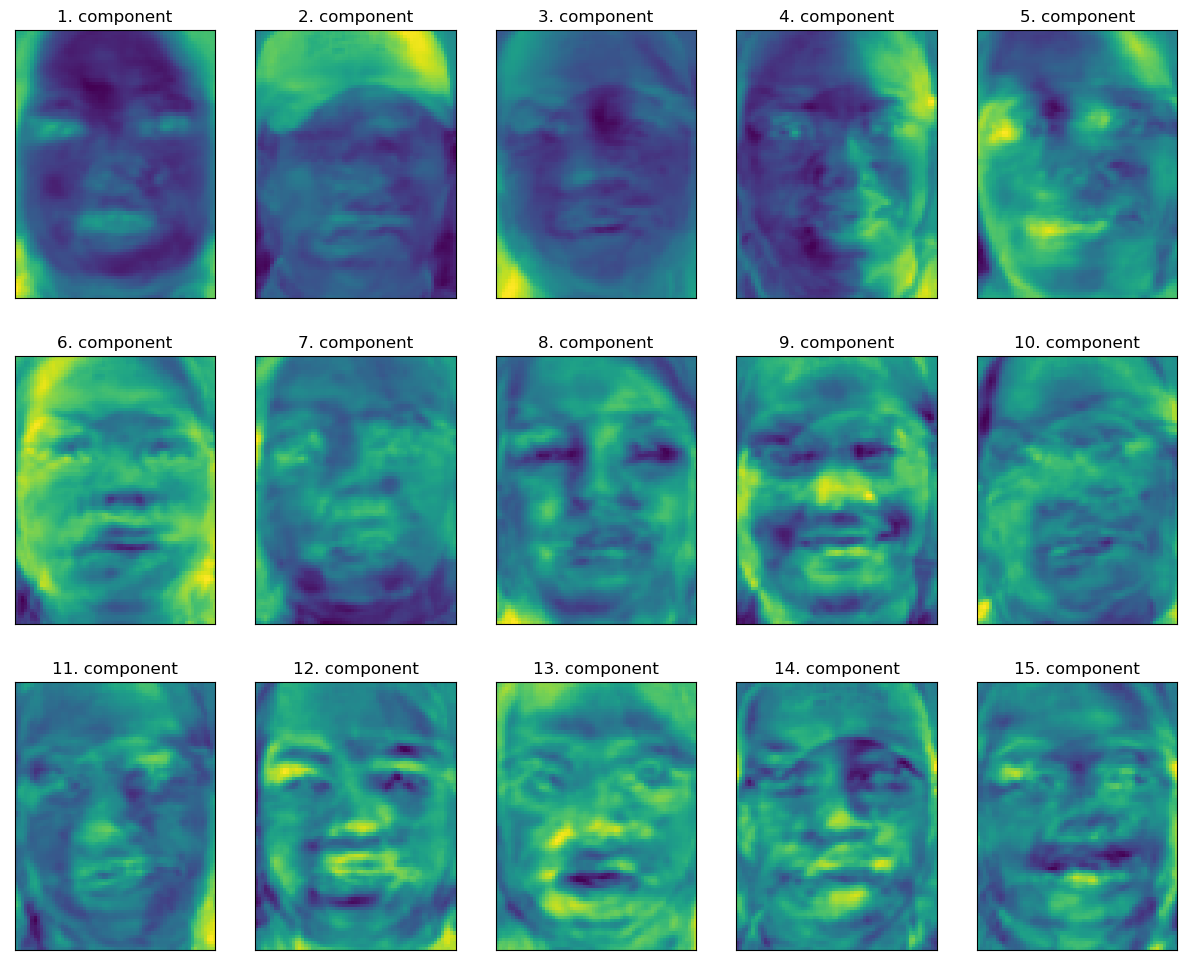

In [17]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape),
 cmap='viridis')
 ax.set_title("{}. component".format((i + 1)))


In [18]:
!pip install mglearn

# Import mglearn
import mglearn

# Define X_train, X_test, and image_shape appropriately before using the function
#mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

In [19]:
#mglearn.plots.plot_pca_faces(X_train, X_test,  n_components )

## Non-Negative Matrix Factorization (NMF)
Non-negative matrix factorization is another unsupervised learning algorithm that
aims to extract useful features. It works similarly to PCA and can also be used for
dimensionality reduction

If we only use a single component, NMF creates a component that points toward the
mean, as pointing there best explains the data. You can see that in contrast with PCA,
reducing the number of components not only removes some directions, but creates
an entirely different set of components! Components in NMF are also not ordered in
any specific way, so there is no “first non-negative component”: all components play
an equal part.
NMF uses a random initialization, which might lead to different results depending on
the random seed. In relatively simple cases such as the synthetic data with two com‐
ponents, where all the data can be explained perfectly, the randomness has little effect
(though it might change the order or scale of the components). In more complex sit‐
uations, there might be more drastic changes.


C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


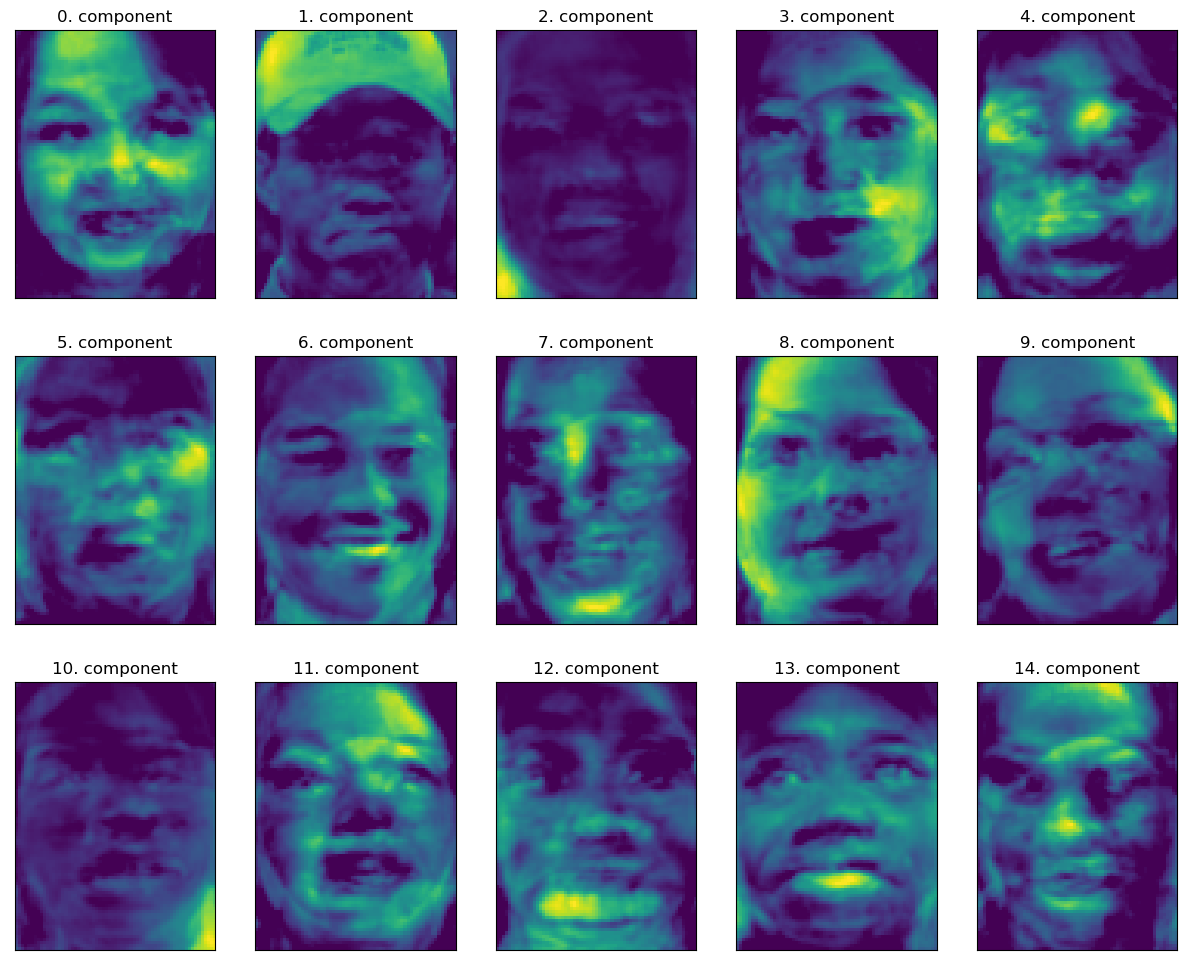

In [21]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape))
 ax.set_title("{}. component".format(i))


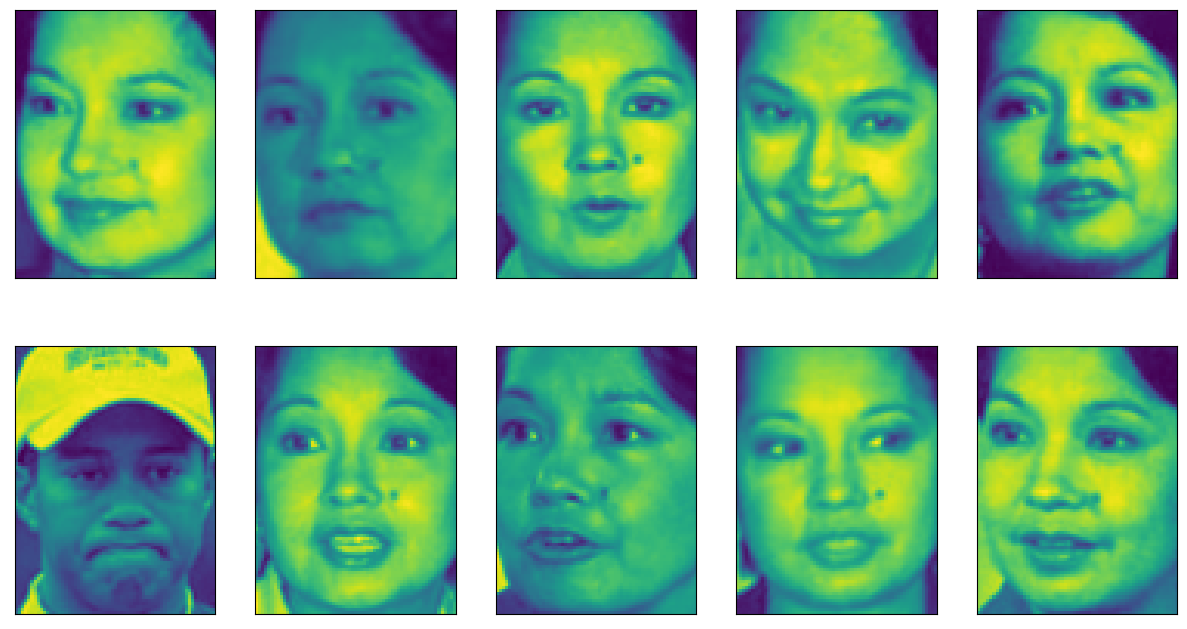

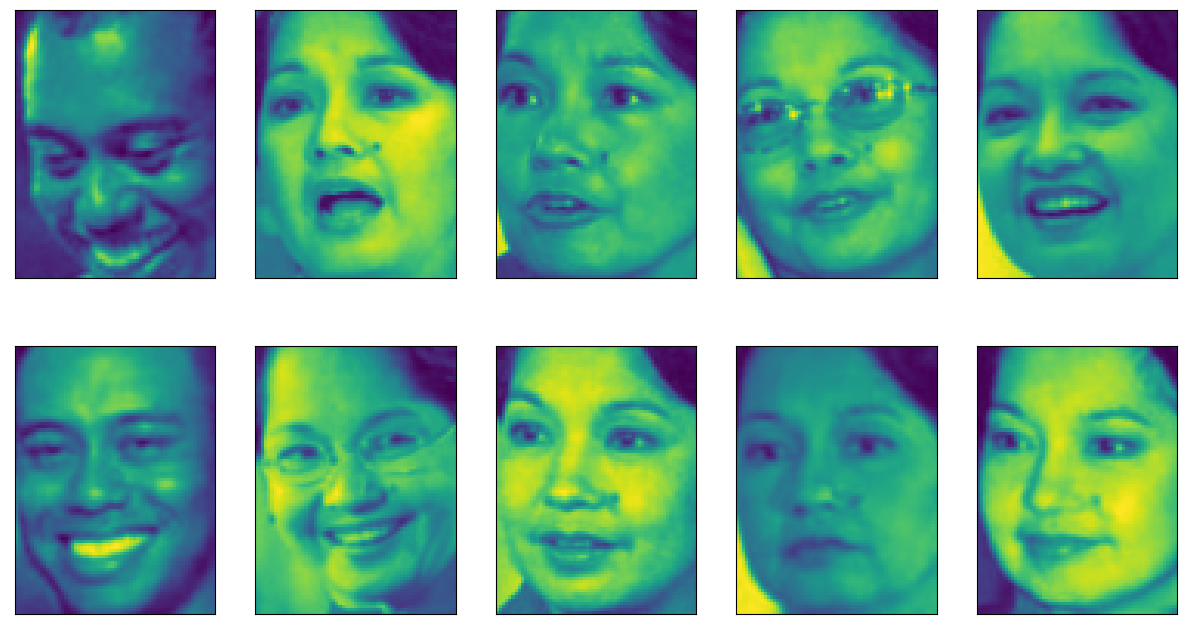

In [22]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
 ax.imshow(X_train[ind].reshape(image_shape))
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
 ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

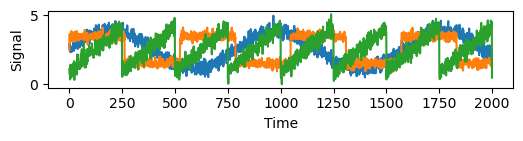

In [24]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [26]:
#mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))


Shape of measurements: (2000, 100)


In [27]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [28]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)


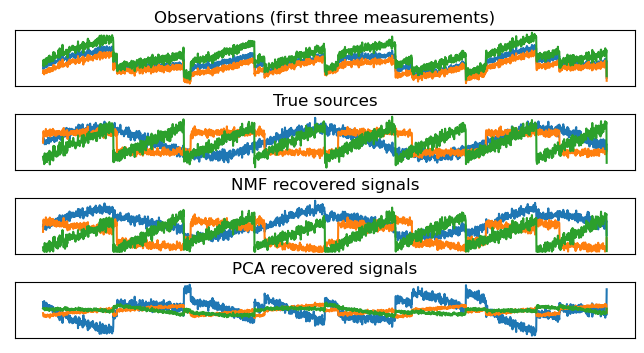

In [30]:
models = [X, S, S_, H]

names = ['Observations (first three measurements)',
 'True sources',
 'NMF recovered signals',
 'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
 subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
 ax.set_title(name)
 ax.plot(model[:, :3], '-')

#### Manifold Learning with t-SNE
While PCA is often a good first approach for transforming your data so that you
might be able to visualize it using a scatter plot, the nature of the method (applying a
rotation and then dropping directions) limits its usefulness, as we saw with the scatter
plot of the Labeled Faces in the Wild dataset. There is a class of algorithms for visuali‐
zation called manifold learning algorithms that allow for much more complex map‐
pings, and often provide better visualizations. A particularly useful one is the t-SNE
algorithm.
Manifold learning algorithms are mainly aimed at visualization, and so are rarely
used to generate more than two new features. Some of them, including t-SNE, com‐
pute a new representation of the training data, but don’t allow transformations of new
data. This means these algorithms cannot be applied to a test set: rather, they can only
transform the data they were trained for. Manifold learning can be useful for explora‐
tory data analysis, but is rarely used if the final goal is supervised learning. The idea
behind t-SNE is to find a two-dimensional representation of the data that preserves
the distances between points as best as possible. t-SNE starts with a random twodimensional representation for each data point, and then tries to make points that are
close in the original feature space closer, and points that are far apart in the original
feature space farther apart. t-SNE puts more emphasis on points that are close by,
rather than preserving distances between far-apart points. In other words, it tries to
preserve the information indicating which points are neighbors to each other.
We will apply the t-SNE manifold learning algorithm on a dataset of handwritten dig‐
its that is included in scikit-learn.
2
 Each data point in this dataset is an 8×8 gray‐
scale image of a handwritten digit between 0 and 1. Figure 3-20 shows an example
image for each class:

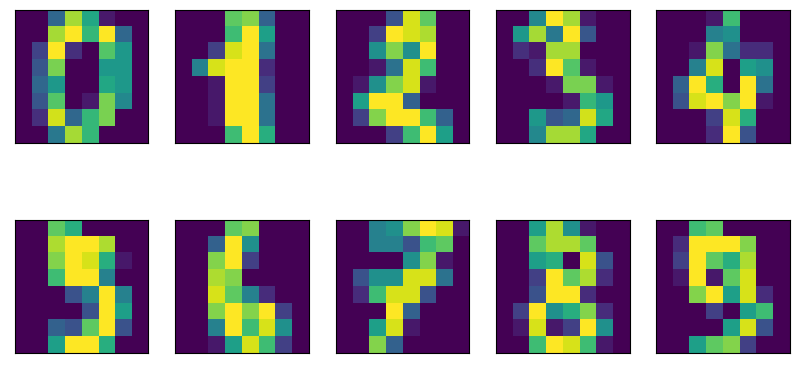

In [31]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
 subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
 ax.imshow(img)


Let’s use PCA to visualize the data reduced to two dimensions. We plot the first two
principal components, and color each dot by its class

Text(0, 0.5, 'Second principal component')

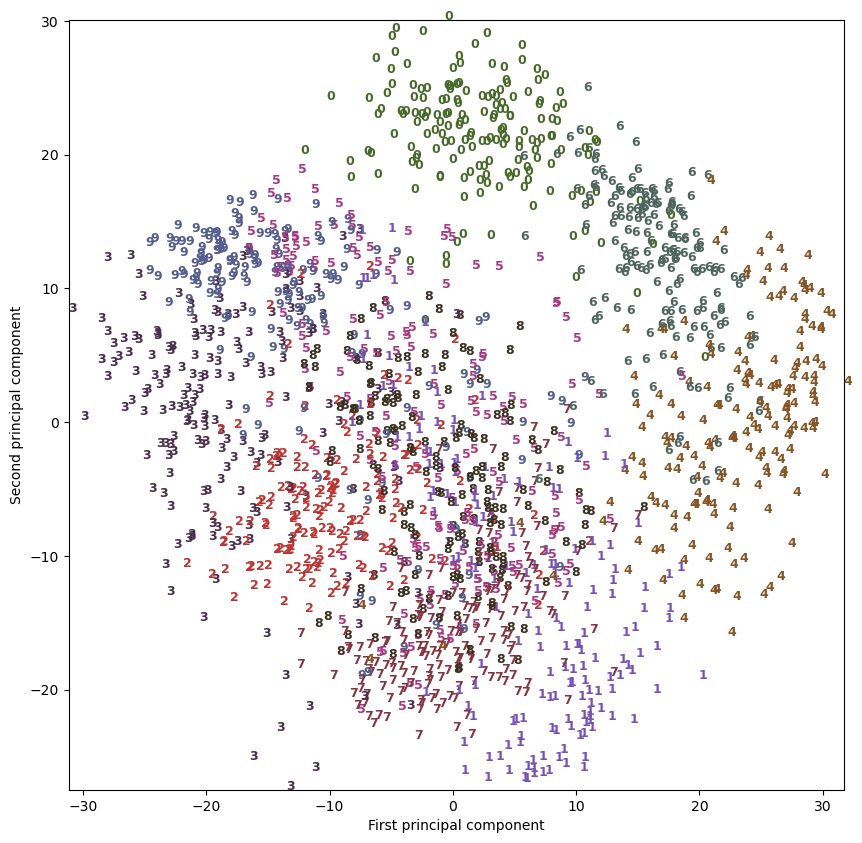

In [32]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
 "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


Let’s apply t-SNE to the same dataset, and compare the results. As t-SNE does not
support transforming new data, the TSNE class has no transform method. Instead, we
can call the fit_transform method, which will build the model and immediately
return the transformed data (

C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 0, 't-SNE feature 1')

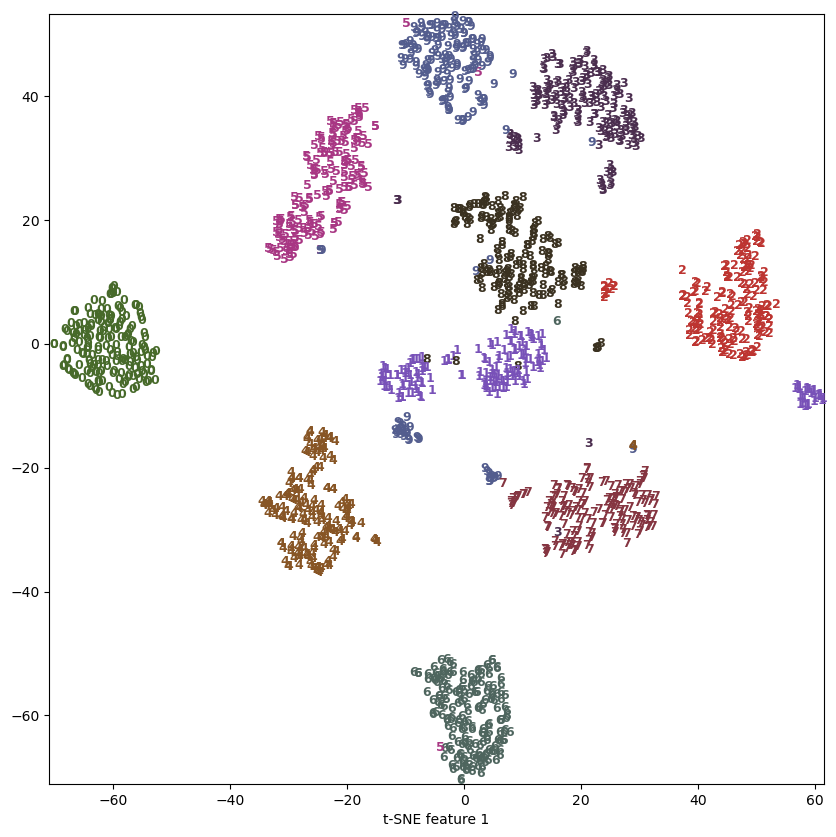

In [34]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")


The result of t-SNE is quite remarkable. All the classes are quite clearly separated.
The ones and nines are somewhat split up, but most of the classes form a single dense
group. Keep in mind that this method has no knowledge of the class labels: it is com‐
pletely unsupervised. Still, it can find a representation of the data in two dimensions
that clearly separates the classes, based solely on how close points are in the original
space.
The t-SNE algorithm has some tuning parameters, though it often works well with
the default settings. You can try playing with perplexity and early_exaggeration,
but the effects are usually minor.

### Clustering
As we described earlier, clustering is the task of partitioning the dataset into groups,
called clusters. The goal is to split up the data in such a way that points within a single
cluster are very similar and points in different clusters are different. Similarly to clas‐
sification algorithms, clustering algorithms assign (or predict) a number to each data
point, indicating which cluster a particular point belongs to.
#### k-Means Clustering
k-means clustering is one of the simplest and most commonly used clustering algo‐
rithms. It tries to find cluster centers that are representative of certain regions of the
data. The algorithm alternates between two steps: assigning each data point to the
closest cluster center, and then setting each cluster center as the mean of the data
points that are assigned to it. The algorithm is finished when the assignment of
instances to clusters no longer changes. The following example (Figure 3-23) illus‐
trates the algorithm on a synthetic dataset:


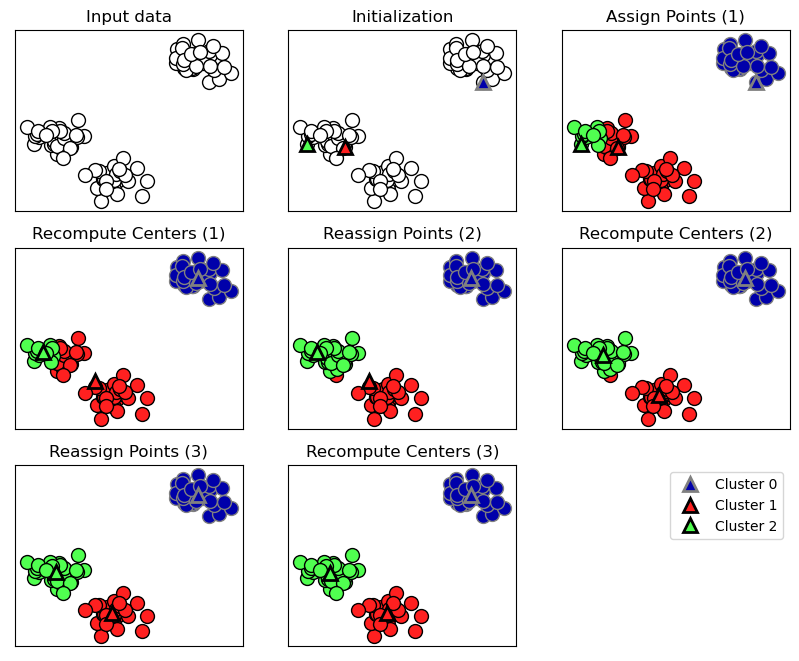

In [40]:
mglearn.plots.plot_kmeans_algorithm()

Cluster centers are shown as triangles, while data points are shown as circles. Colors
indicate cluster membership. We specified that we are looking for three clusters, so
the algorithm was initialized by declaring three data points randomly as cluster cen‐
ters (see “Initialization”). Then the iterative algorithm starts. First, each data point is
assigned to the cluster center it is closest to (see “Assign Points (1)”). Next, the cluster
centers are updated to be the mean of the assigned points (see “Recompute Centers
(1)”). Then the process is repeated two more times. After the third iteration, the
assignment of points to cluster centers remained unchanged, so the algorithm stops.
Given new data points, k-means will assign each to the closest cluster center. The nex

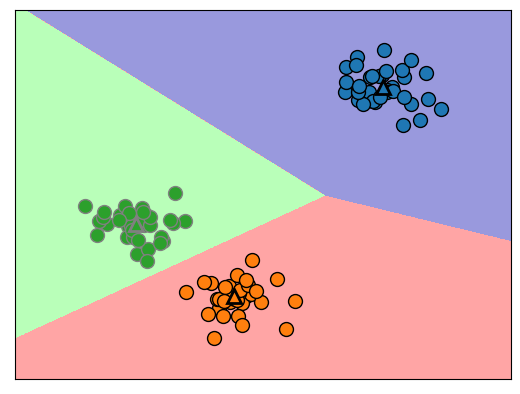

In [42]:
mglearn.plots.plot_kmeans_boundaries()

In [43]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


KMeans(n_clusters=3)

In [44]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


You can also assign cluster labels to new points, using the predict method. Each new
point is assigned to the closest cluster center when predicting, but the existing model
is not changed. Running predict on the training set returns the same result as
labels_:

In [45]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


clustering is somewhat similar to classification, in that each item gets
a label. However, there is no ground truth, and consequently the labels themselves
have no a priori meaning. Let’s go back to the example of clustering face images that
we discussed before. It might be that the cluster 3 found by the algorithm contains
only faces of your friend Bela. You can only know that after you look at the pictures,
though, and the number 3 is arbitrary. The only information the algorithm gives you
is that all faces labeled as 3 are similar.


In [38]:
from sklearn.cluster import KMeans
X_train, X_test, y_train, y_test = train_test_split(
 X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=50, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=50, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=50, random_state=0)
kmeans.fit(X_train)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)


C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'nmf')

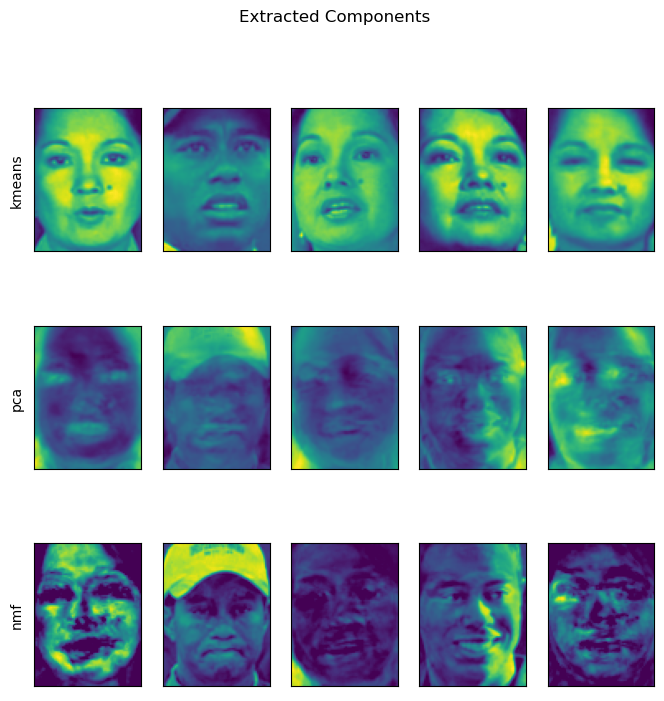

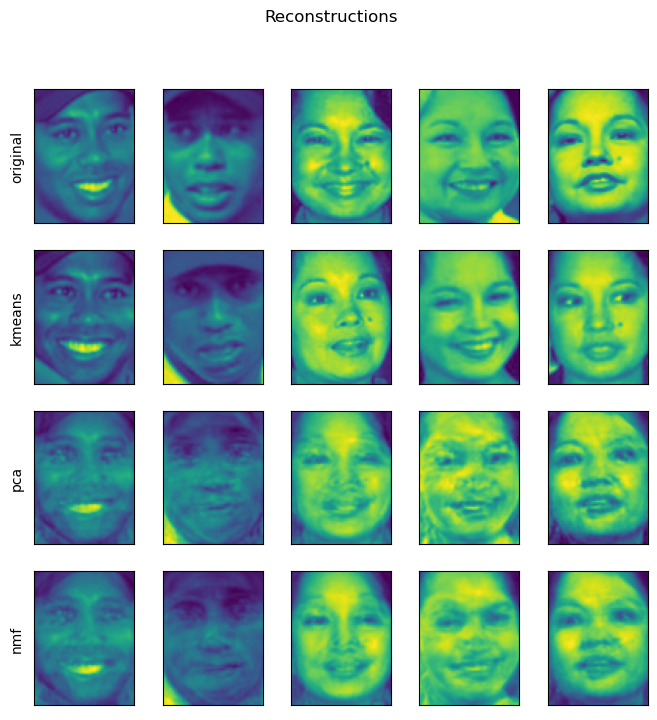

In [39]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
 axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
 ax[0].imshow(comp_kmeans.reshape(image_shape))
 ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
 ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
 figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
 axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
 X_reconstructed_nmf):
 ax[0].imshow(orig.reshape(image_shape))
 ax[1].imshow(rec_kmeans.reshape(image_shape))
 ax[2].imshow(rec_pca.reshape(image_shape))
 ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
